In [45]:
from PIL import Image
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

start_year = 1990
end_year = 2022
directory_path = 'google earth'
# Loop through each year and process the images if they exist

spatial_resolution = 0.04*1000  # Replace with the actual spatial resolution of your images (km)

# Prepare a list to hold the data
green_area_data = [["Year", "Green Area (sq metre)"]]

for year in range(start_year, end_year + 1):

    # Construct the image path

    img_path = f'google earth/{year}.jpg'

    # Convert the image to RGB if it is a .png
    if os.path.exists(img_path):
        #print(img_path)
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert image to NumPy array
        img_array = np.array(img)

        # Define a threshold to consider an RGB pixel as 'green'
        # This is a naive approach - in reality, the threshold might need to be adjusted
        # or a more complex algorithm might be needed for accurate results

        green_threshold = np.array([0,20,21])
        upper_green = np.array([44, 63, 57])

        # Create a mask that finds all the pixels that have a green value greater than the threshold
        # and a red and blue value less than the green value (to exclude white, gray, etc.)
        green_mask = ((img_array[:, :, 1] > green_threshold[1]) &
                      (img_array[:, :, 0] < upper_green[0]) &
                      (img_array[:, :, 2] < upper_green[2]))

        # Count the green pixels
        green_pixels = np.count_nonzero(green_mask)
        green_area = green_pixels * spatial_resolution
        green_area_data.append([year, green_area])
        
        # Highlight the green pixels on the image
        highlighted_img_array = img_array.copy()
        highlighted_img_array[green_mask] = [255,0,0]  # Highlight in red for visibility

        # Create a PIL image from the NumPy array
        highlighted_img = Image.fromarray(highlighted_img_array)

        # Save the highlighted image
        highlighted_img_path = f'google earth/highlighted_{year}.jpg'
        highlighted_img.save(highlighted_img_path)
        print("done processing",year)
        highlighted_img_path, green_pixels


done processing 1990
done processing 1991
done processing 1992
done processing 1994
done processing 1995
done processing 1996
done processing 1997
done processing 1998
done processing 2000
done processing 2001
done processing 2002
done processing 2004
done processing 2005
done processing 2006
done processing 2007
done processing 2008
done processing 2010
done processing 2011
done processing 2012
done processing 2013
done processing 2014
done processing 2015
done processing 2016
done processing 2017
done processing 2018
done processing 2019
done processing 2020
done processing 2021
done processing 2022


In [46]:
# Output the data in CSV-like format
csv_filename = 'green_area_by_year.csv'
with open(csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(green_area_data)

print(f"Data written to {csv_filename}.")


Data written to green_area_by_year.csv.


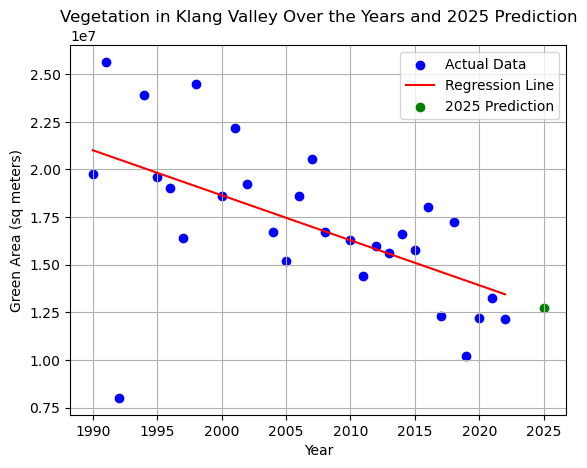

12733364.70801264

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Simulated greenery area data from 1990 to 2022
# In a real scenario, this data would be loaded from the CSV file
data = pd.read_csv("green_area_by_year.csv")

# Fit a linear regression model
X = data['Year'].values.reshape(-1, 1)  # Independent variable (year)
y = data['Green Area (sq metre)'].values  # Dependent variable (greenery area)
model = LinearRegression().fit(X, y)

# Plot the existing data
plt.scatter(data['Year'], data['Green Area (sq metre)'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(data['Year'], model.predict(X), color='red', label='Regression Line')

# Predict the greenery area for 2025
year_2025 = np.array([[2025]])
prediction_2025 = model.predict(year_2025)

# Add the prediction to the plot
plt.scatter(year_2025, prediction_2025, color='green', label='2025 Prediction')

# Additional plot formatting
plt.title('Vegetation in Klang Valley Over the Years and 2025 Prediction')
plt.xlabel('Year')
plt.ylabel('Green Area (sq meters)')
plt.legend()
plt.grid(True)
plt.show()

# Output the prediction for 2025
prediction_2025[0]

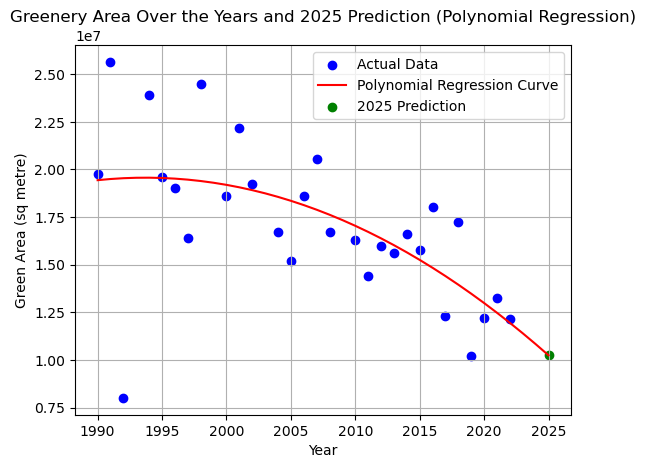

10241716.585372925

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Given the reset, we need to re-import the libraries and re-define the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("green_area_by_year.csv")
# Define the data again
#data = pd.DataFrame({
#   'Year': np.arange(1990, 2023),
#   'Green_Area': np.random.randint(1000000, 5000000, size=33)  # Random data for example
#})

# Setup the polynomial features and linear regression pipeline
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Independent variable (years) reshaped as a feature matrix
X = data['Year'].values.reshape(-1,1)

# Dependent variable (greenery area)
y = data['Green Area (sq metre)']

# Fit the model
polyreg.fit(X,y)

# Generate a range of years for predictions including up to 2025
X_range = np.arange(1990, 2026).reshape(-1,1)

# Predict the greenery area across the range of years
y_pred = polyreg.predict(X_range)

# Plot the actual data
plt.scatter(data['Year'], data['Green Area (sq metre)'], color='blue', label='Actual Data')

# Plot the polynomial regression curve
plt.plot(X_range, y_pred, color='red', label='Polynomial Regression Curve')

# Predict and plot the greenery area for 2025
year_2025 = np.array([[2025]])
prediction_2025 = polyreg.predict(year_2025)
plt.scatter(year_2025, prediction_2025, color='green', label='2025 Prediction')

# Additional plot formatting
plt.title('Greenery Area Over the Years and 2025 Prediction (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Green Area (sq metre)')
plt.legend()
plt.grid(True)
plt.show()

# Output the polynomial prediction for 2025
prediction_2025[0]
